# Advanced Exercise 2
## Titanic Dataset

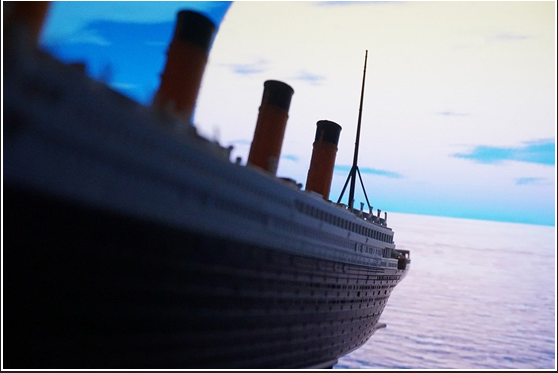

<ul>
<li><b>2. Use the "titanic" dataset from the seaborn datasets
(sns.load_dataset('titanic')).</b> Find out the features of a typical person
that survived or did not survive the sinking of Titanic.</li>
</ul>

In [4]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns

# Loading the titanic dataset
df = sns.load_dataset('titanic')
df.head(5)

# All the data attributes seem in order and the data is clean.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
# Cleaning

In [5]:
# Checking for null values.
df.isna().sum()

# The deck column should be dropped. 
# Age has quite a few missing too, but average age is probably not accurate.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# Dropping deck, because there are too many missing values.
df = df.drop('deck', axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [11]:
# Making a categorial imputation for this dataset.
df.groupby('class').mean('age')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_7120\4244992696.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class').mean('age')


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


---
# EDA

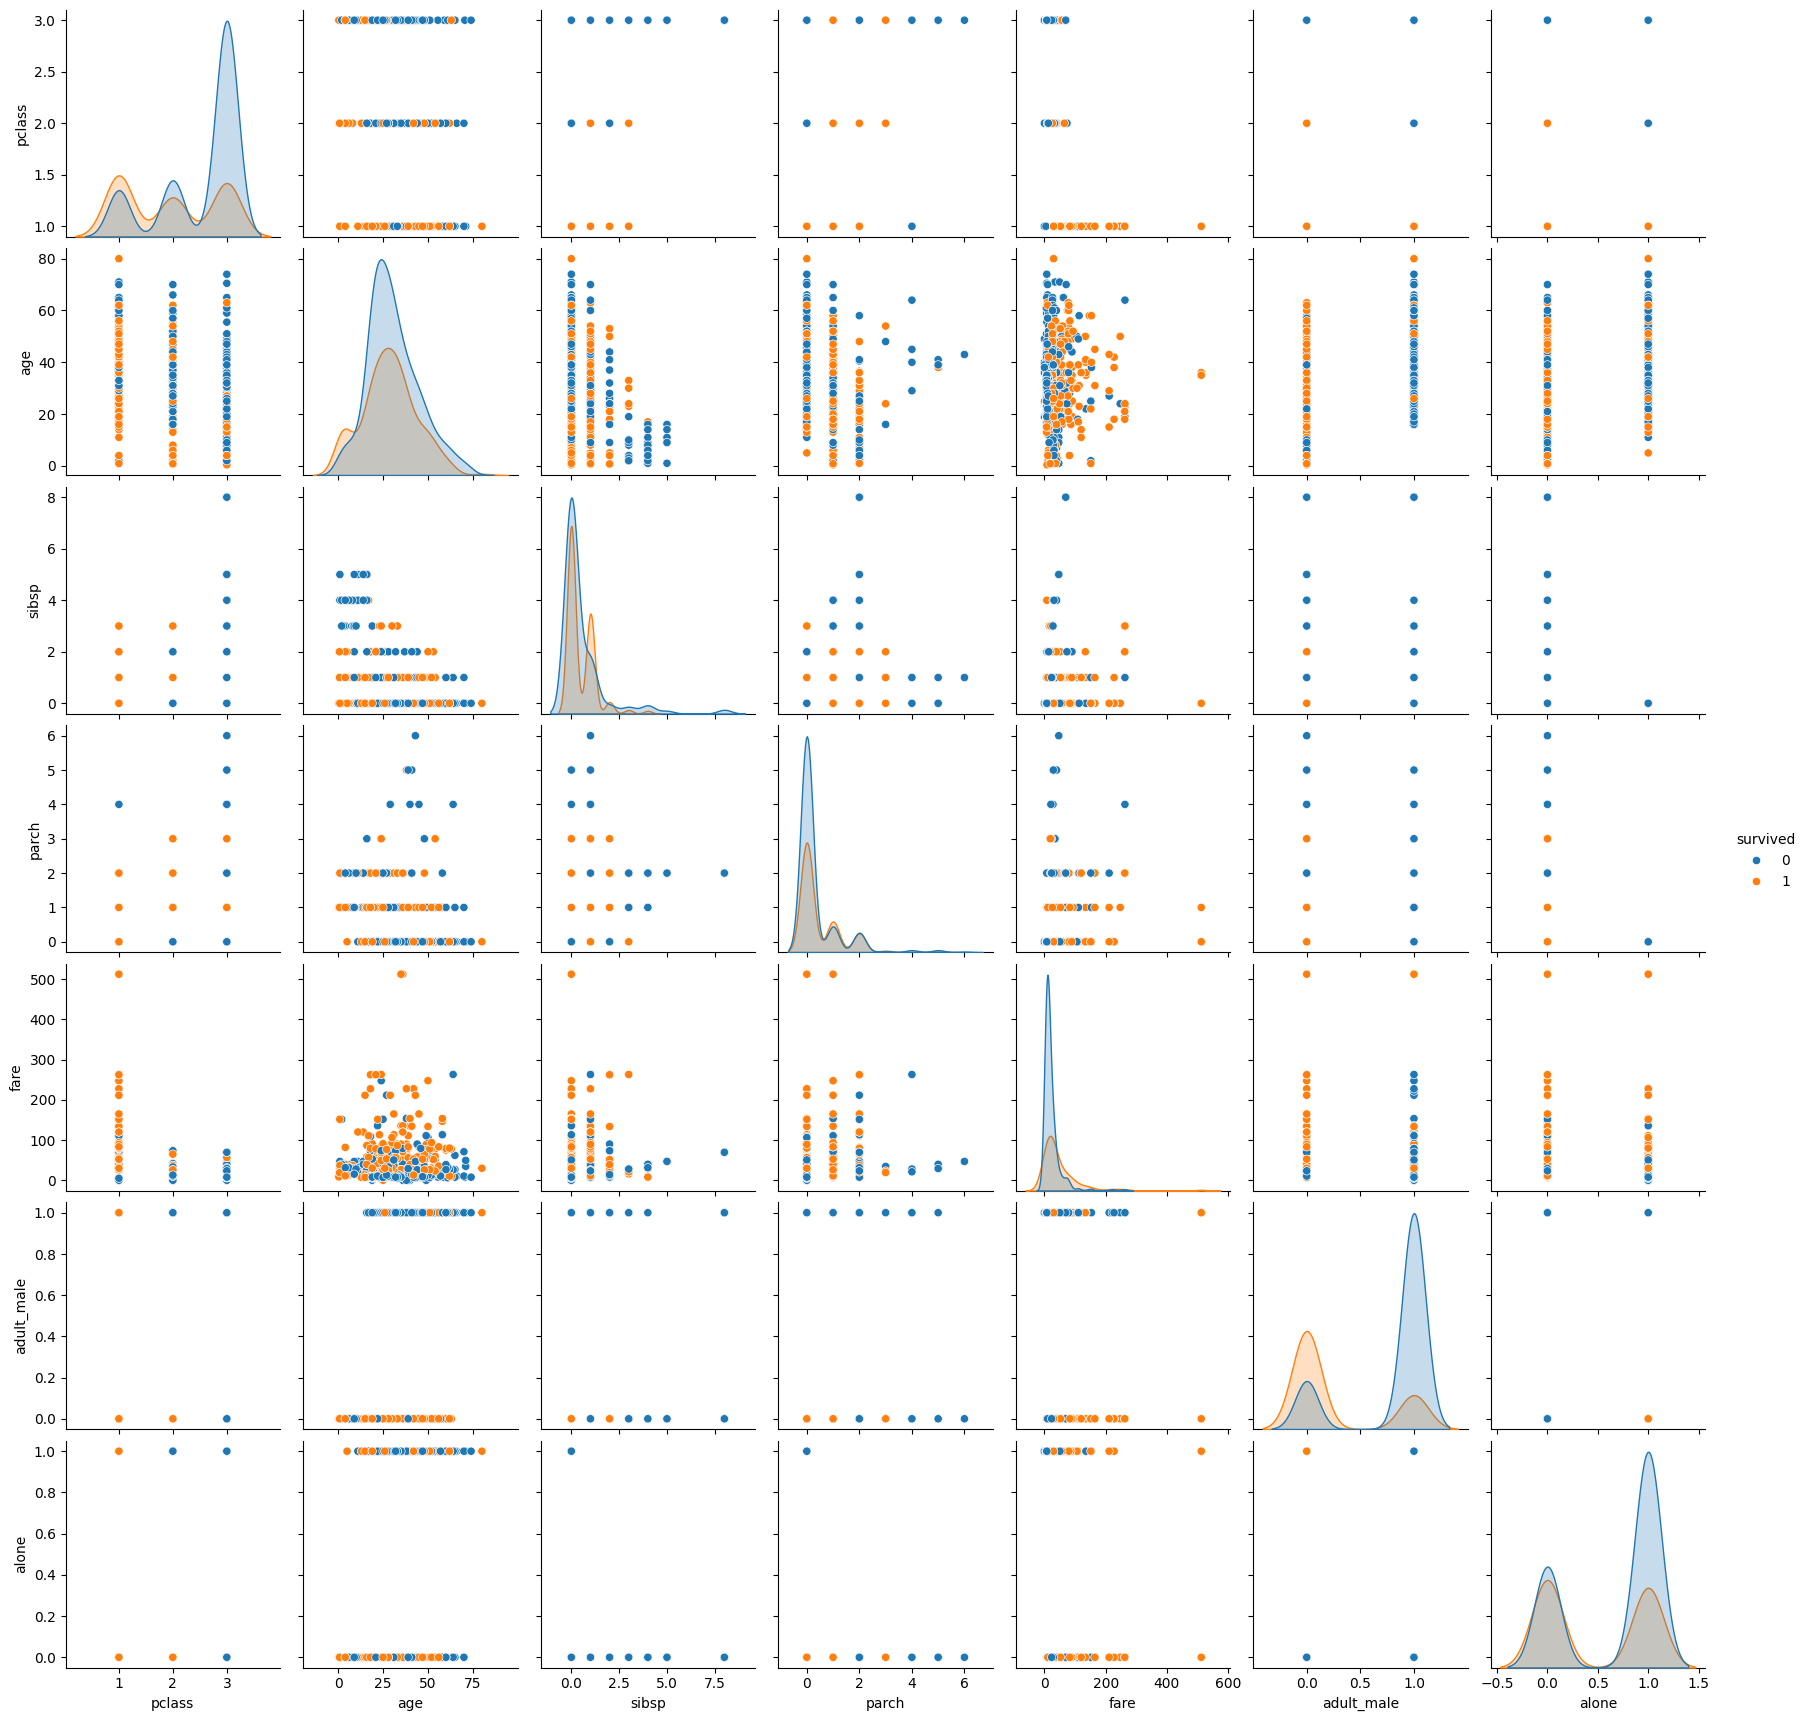

In [6]:
# Using pairplot to find general patterns.
sns.pairplot(data=df, hue='survived')

# Observations: 
# pclass, age, gender seem to have some sort connections with survival.
# Let's investigate those columns more.

<Axes: xlabel='age', ylabel='fare'>

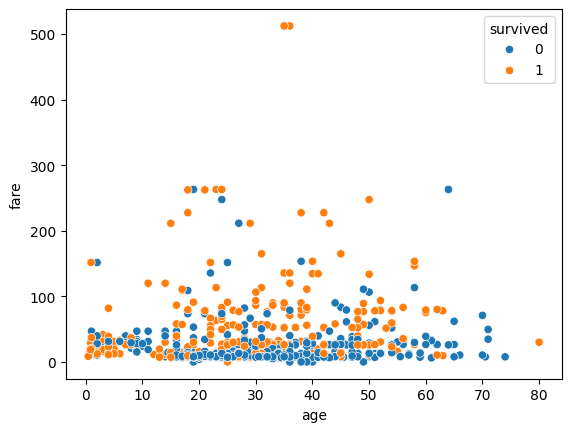

In [7]:
# There is a small connection where people who pay more are more likely to survive.
sns.scatterplot(x='age', y='fare', hue='survived', data=df)

# Notice a cell of survived children between 0 and 8 in the origin of the scatterplot.
# This indicates that children between 0 and 5 were likely to survive the distaster.

<Axes: >

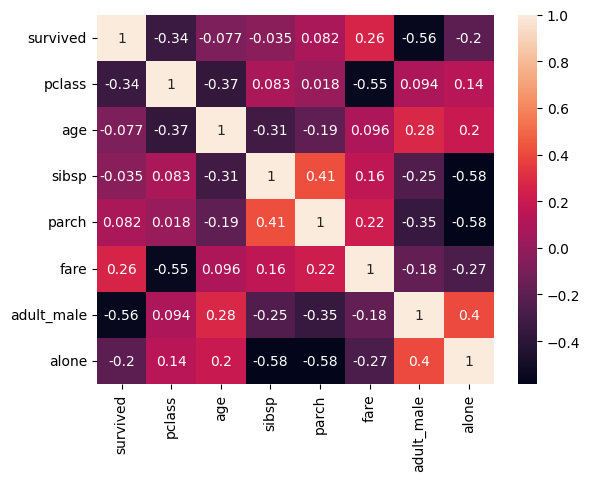

In [8]:
# Making a heatmap
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)

# It appears that adult_males, fare, pclass, and perhaps age play big actors into survival.

<Axes: xlabel='adult_male', ylabel='parch'>

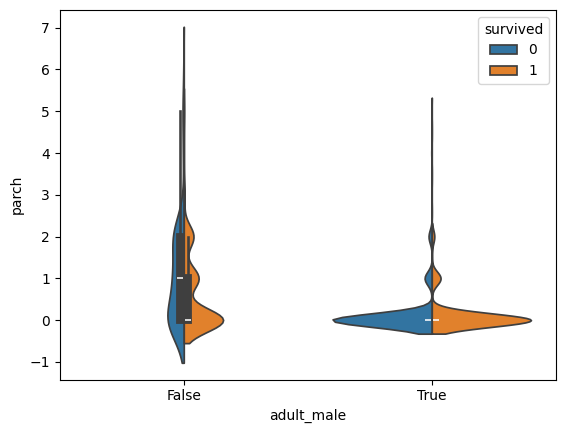

In [9]:
# Creating a violin plot to determine whether adult men with kids are more likely to survive.
sns.violinplot(x='adult_male', y='parch', hue='survived', data=df, split=True)

# It appears fathers with kids on board are almost just as likely to survive as males without kids.

# Answer:

From this, we can conclude the following:

* Males are the least likely to survive.
* The lower the pclass, the more likely you are to survive.
* The older you are. The less likely you are to surive.

---
## Extra research (not necessary to answer the question)

#### Lifeboat locations of the lifeboats.
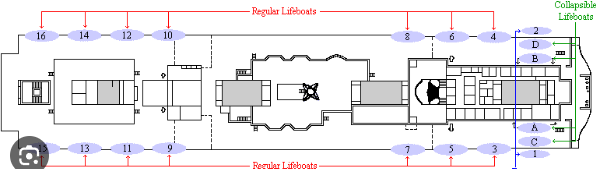

Taken from the Titan Inquiry Project.

It appears that the lifeboats were accessable from the promenade deck (the  main floor of the ship.) So that begs the question, how far were the lifeboats from each passenger class?


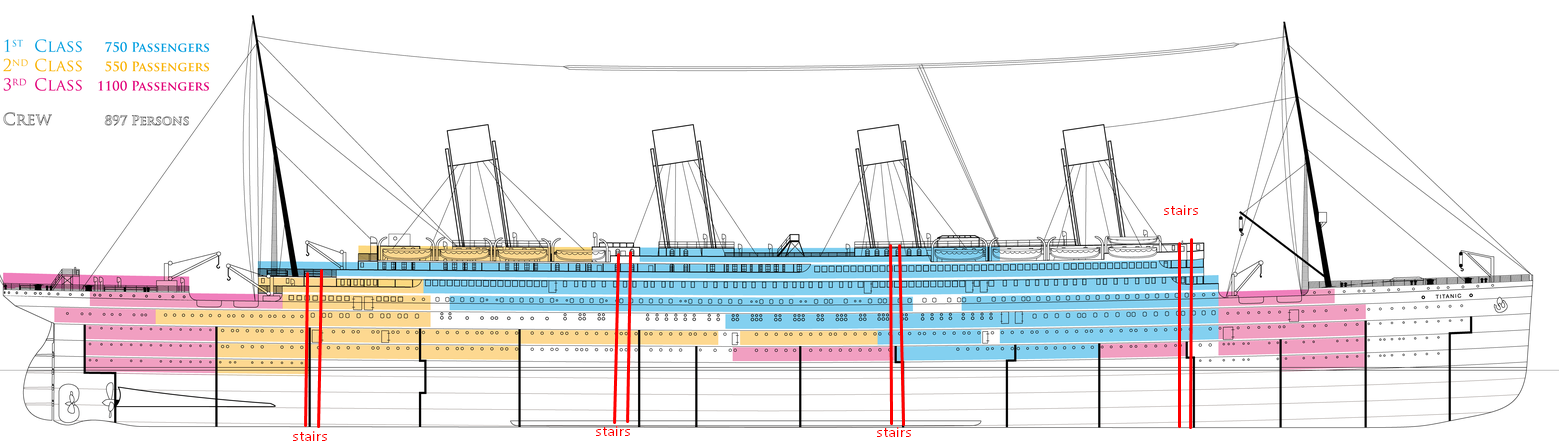

Taken from rpmarchildon


After some research on the deck plan of The Titanic, I marked the stairs on this picture. 
We can see that pclass 3 is deeper/lower in the ship and also further away from the liferafts.
Which may explain the linear correlation between pclass and survival. Notice how pclass 3 also has
capacity for 1100 passengers in such a small area. Meaning if it's crowded and everyone is in panic,
there would be some issues in getting through that area.


Sources: https://en.wikipedia.org/wiki/Grand_Staircase_of_the_Titanic#:~:text=all%20the%20world.-,Location,Boat%20Deck%20and%20E%2DDeck.

---
### Quick Navigation

Click to go back to:  [ **DataAnalyticsExerciseSet3.ipynb** ](DataAnalyticsExerciseSet3.ipynb)